In [21]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import copy

In [4]:
dogproblem = BayesNet()
dogproblem.load_from_bifxml('testing/dog_problem.BIFXML')

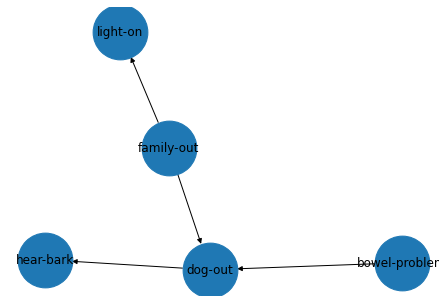

In [16]:
dogproblem.draw_structure()

In [6]:
dogproblem.get_all_variables()

['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']

In [7]:
dogproblem.get_all_cpts()

{'light-on':    family-out  light-on     p
 0       False     False  0.60
 1       False      True  0.40
 2        True     False  0.05
 3        True      True  0.95, 'bowel-problem':    bowel-problem     p
 0          False  0.01
 1           True  0.99, 'dog-out':    family-out  bowel-problem  dog-out     p
 0       False          False    False  0.99
 1       False          False     True  0.01
 2       False           True    False  0.97
 3       False           True     True  0.03
 4        True          False    False  0.90
 5        True          False     True  0.10
 6        True           True    False  0.30
 7        True           True     True  0.70, 'hear-bark':    dog-out  hear-bark     p
 0    False      False  0.70
 1    False       True  0.30
 2     True      False  0.01
 3     True       True  0.99, 'family-out':    family-out     p
 0       False  0.15
 1        True  0.85}

In [9]:
dogproblem.get_children('light-on')

[]

In [ ]:
x = ['light-on']
y = ['bowel-problem']
z = ['hear-bark']
xyz = x + y + z
print(xyz)
bn = copy.deepcopy(dogproblem)
for variable in bn.get_all_variables():
    children = bn.get_children(variable)
    if len(children) == 0:
        if variable not in xyz:
            bn.del_var(variable)
            
        